<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Modeling" data-toc-modified-id="Modeling-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Modeling</a></span><ul class="toc-item"><li><span><a href="#Split-the-Data" data-toc-modified-id="Split-the-Data-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Split the Data</a></span></li><li><span><a href="#Preprocessing" data-toc-modified-id="Preprocessing-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Preprocessing</a></span></li></ul></li></ul></div>

In [84]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt


pd.plotting.register_matplotlib_converters()
%matplotlib inline
from IPython.display import display
from itertools import combinations
from collections import Counter


import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor,HistGradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# pre_preprocessing
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder , StandardScaler , MinMaxScaler , RobustScaler


# Resampling
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Valdiation
from sklearn.model_selection import StratifiedShuffleSplit , StratifiedKFold , GroupKFold
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.model_selection import KFold

# Modeling
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


# Metrics
from sklearn.metrics import r2_score , median_absolute_error , mean_squared_error, mean_absolute_error

import warnings
warnings.filterwarnings('ignore')

#display all column of df 
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None) 
# to format the scientific presntastion of numbers 
pd.options.display.float_format = '{:.2f}'.format


# Modeling

In [87]:
df_clean = pd.read_csv('Clean_data.csv')

In [88]:
df_clean.head()

,type,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,sales_per_customer,delivery_status,customer_country,customer_segment,market,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,order_item_quantity,sales,product_category_id,product_name,shipping_mode,Month_shipping_date_(dateorders),Year_shipping_date_(dateorders),Month_order_date_(dateorders),Year_order_date_(dateorders)
0,CASH,2,4,88.79,239.98,Advance shipping,EE. UU.,Consumer,LATAM,0.20,299.98,0.37,1,299.98,43,Diamondback Women's Serene Classic Comfort Bi,Standard Class,1,2015,1,2015
1,PAYMENT,3,4,68.25,227.50,Advance shipping,EE. UU.,Consumer,LATAM,0.09,50.00,0.30,5,250.00,24,Nike Men's Dri-FIT Victory Golf Polo,Standard Class,1,2015,1,2015
2,PAYMENT,3,4,91.18,193.99,Advance shipping,EE. UU.,Consumer,LATAM,0.03,199.99,0.47,1,199.99,48,Pelican Sunstream 100 Kayak,Standard Class,1,2015,1,2015
3,PAYMENT,3,4,36.47,107.89,Advance shipping,EE. UU.,Consumer,LATAM,0.17,129.99,0.34,1,129.99,18,Nike Men's CJ Elite 2 TD Football Cleat,Standard Class,1,2015,1,2015
4,CASH,5,4,33.59,159.94,Late delivery,EE. UU.,Home Office,LATAM,0.20,49.98,0.21,4,199.92,46,O'Brien Men's Neoprene Life Vest,Standard Class,1,2015,1,2015


In [89]:
df_clean.drop(['sales_per_customer','Month_shipping_date_(dateorders)','Year_shipping_date_(dateorders)'], axis=1 , inplace = True)

## Split the Data

In [90]:
target = 'sales'

In [91]:
train , test , y_train , y_test = train_test_split(df_clean.drop(target,axis=1),df_clean.sales , test_size=0.30, shuffle=True,random_state=45)

In [92]:
train.shape,test.shape

((126021, 17), (54010, 17))

## Preprocessing

In [93]:
cat = train.select_dtypes(exclude=["int","float"]).columns.to_list()
num = train.select_dtypes(exclude='O').columns.to_list()

feat = train.columns.to_list()

In [94]:
le = LabelEncoder()


for fea in cat:
    train[fea] = le.fit_transform(train[fea])
    test[fea] = le.transform(test[fea])



# train = pd.get_dummies(train, columns=cat,dtype='int')
# test = pd.get_dummies(test, columns=cat,dtype='int')

In [95]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, QuantileTransformer,PolynomialFeatures,PowerTransformer
from imblearn.pipeline import Pipeline
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import AdaBoostRegressor,HistGradientBoostingRegressor

In [96]:
# Define the preprocessing steps
preprocessor1 = ColumnTransformer(
    
    transformers = [
        
        ('num', Pipeline(steps=[ ('scaler', RobustScaler())]), num) 
    
    ],verbose_feature_names_out = False)

preprocessor2 = ColumnTransformer(transformers = [
    
        ('num', Pipeline(steps=[ ('scaler', StandardScaler())]), num),
    
])

In [97]:
pipeline2 = Pipeline(steps=[
    ('process' , preprocessor2),
    ('model',LinearRegression())
])

# Cross-Validation
scores = cross_val_score(pipeline2, train, y_train, cv=5, scoring="neg_mean_squared_error")
rmse_scores = np.sqrt(-scores)

# print(f"Model: {name}")
print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})\n")

Cross-Validation RMSE: 33.40 (+/- 0.13)



In [101]:
# Models to Test
models = {
    
    "XGBoost": XGBRegressor(objective="reg:squarederror", random_state=42),
    "LightGBM": LGBMRegressor(max_depth=5,n_estimators=300,random_state=45,learning_rate=0.5),
    "Adboost": HistGradientBoostingRegressor(),
    
}


dtrain ,dval, y_dtrain , y_dval = train_test_split(train , y_train,test_size=0.25,shuffle=True,random_state=42)

# Evaluate Each Model


for name, model in models.items():
    # Create Pipeline
    pipeline = Pipeline(steps=[
        
        ("preprocessor", preprocessor1),
        
        ("model", model)
    ])
    pipeline.fit(dtrain,y_dtrain)
    # Cross-Validation
    scores = cross_val_score(pipeline, dtrain, y_dtrain, cv=5, scoring="neg_mean_squared_error")
    rmse_scores = np.sqrt(-scores)
    pred = pipeline.predict(dval)
    

    print(f"Model: {name}")
    print(f"Cross-Validation RMSE: {rmse_scores.mean():.2f} (+/- {rmse_scores.std():.2f})")
    print(f"val RMSE: {np.sqrt(mean_squared_error(y_dval,pred)):.2f}")
    print(f"val R2 : {r2_score(y_dval,pred)}\n")


Model: XGBoost
Cross-Validation RMSE: 0.06 (+/- 0.02)
val RMSE: 0.04
val R2 : 0.9999998596527854

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004263 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 94515, number of used features: 10
[LightGBM] [Info] Start training from score 200.442770
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with p

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002311 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 540
[LightGBM] [Info] Number of data points in the train set: 75612, number of used features: 10
[LightGBM] [Info] Start training from score 200.449637
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001344 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 75612, n

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 541
[LightGBM] [Info] Number of data points in the train set: 75612, number of used features: 10
[LightGBM] [Info] Start training from score 200.340357
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [68]:
#Plot the LGBM Features Importances
def plotImp(model, X , num = 20, fig_size = (40, 20)):
    feature_imp = pd.DataFrame({'Value':model.feature_importances_,'Feature':X.columns})
    plt.figure(figsize=fig_size)
    sns.set(font_scale = 5)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value", 
                                                        ascending=False)[0:num])
    plt.title('LightGBM Features (avg over folds)')
    plt.tight_layout()
    plt.savefig('lgbm_importances-01.png')
    plt.show()

In [69]:
train[num] = pd.DataFrame(preprocessor1.fit_transform(train[num]))

In [70]:
train.head()

,type,days_for_shipping_(real),days_for_shipment_(scheduled),benefit_per_order,delivery_status,customer_country,customer_segment,market,order_item_discount_rate,order_item_product_price,order_item_profit_ratio,order_item_quantity,product_category_id,product_name,shipping_mode,Month_order_date_(dateorders),Year_order_date_(dateorders)
94431,2,0.00,-1.00,0.49,3,0,1,4,0.67,0.93,0.32,0.00,0.70,21,1,0.83,0.00
8215,2,0.00,-1.00,-0.33,1,0,0,2,0.00,-0.13,0.29,0.00,1.70,56,3,-0.83,1.00
139964,1,NaN,NaN,NaN,1,1,2,2,NaN,NaN,NaN,NaN,NaN,18,3,NaN,NaN
163277,1,NaN,NaN,NaN,1,0,0,1,NaN,NaN,NaN,NaN,NaN,18,3,NaN,NaN
102864,1,0.00,0.00,1.41,3,0,0,4,-0.50,2.27,0.07,0.00,0.59,56,3,-0.50,0.50


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004023 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 685
[LightGBM] [Info] Number of data points in the train set: 126021, number of used features: 17
[LightGBM] [Info] Start training from score 200.389920
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

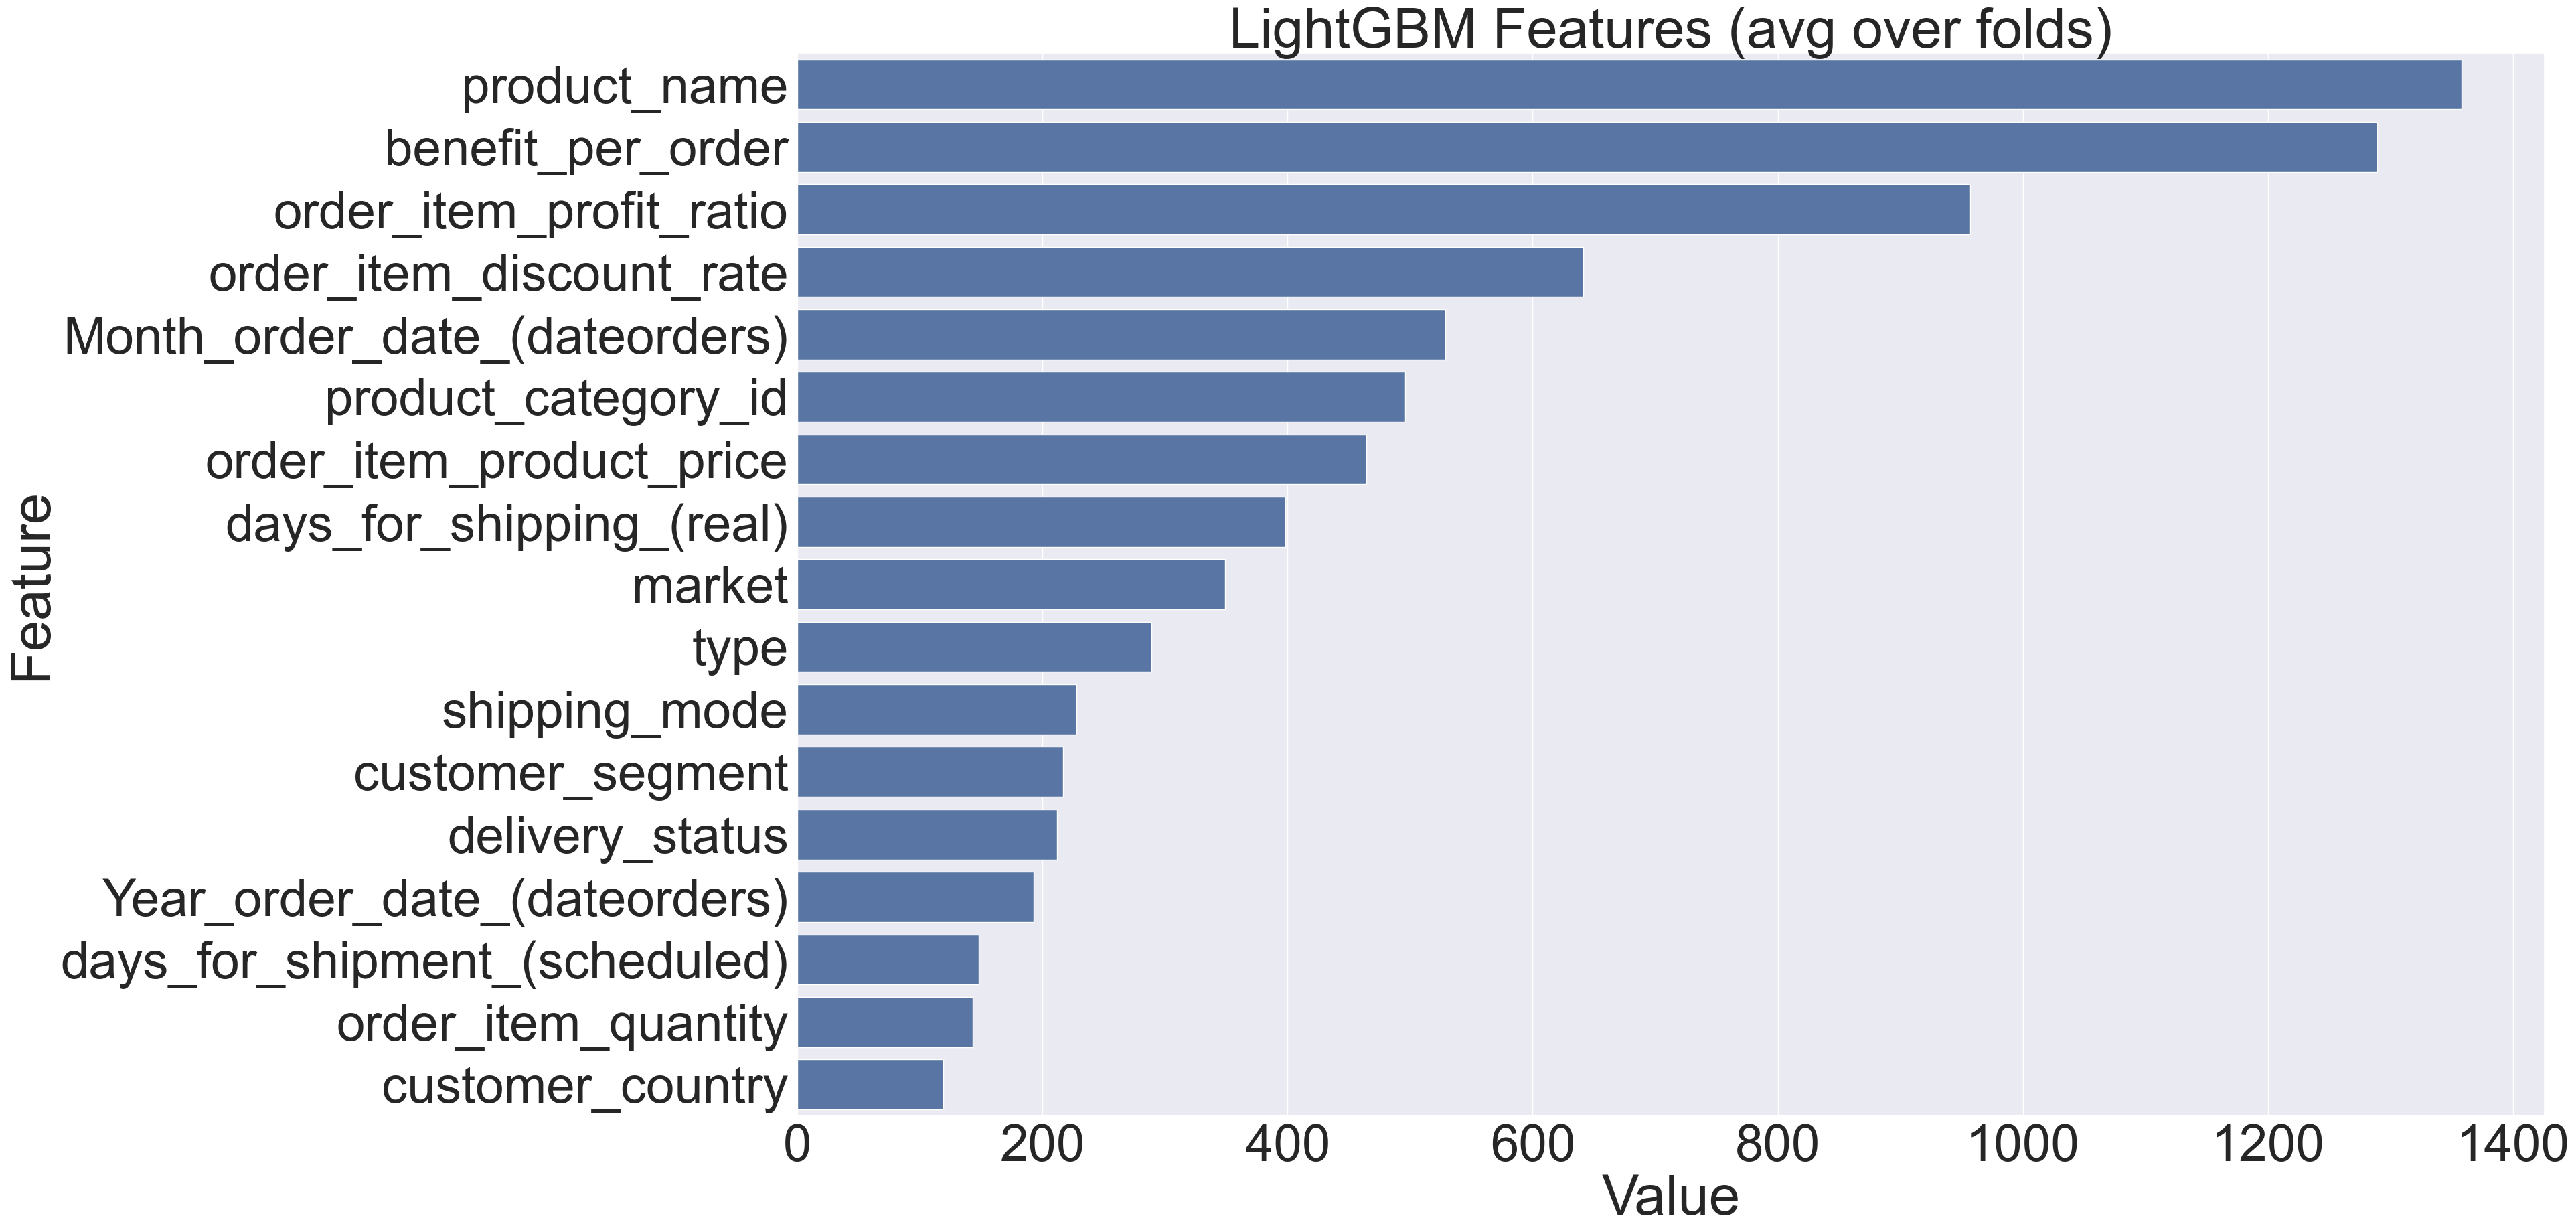

In [71]:
gbm = LGBMRegressor(max_depth=5,n_estimators=300,random_state=45,learning_rate=0.5)

gbm.fit(train,y_train)
plotImp(gbm,train)